# Text Analysis

We begin by importing necessary libraries and loading the data.
Extensive data cleaning is performed in order to align the data with the requirements of the task.
This is necessary since we are working with multiple datasets and the data is not in the same format and have different naming conventions and/or lacks a matching factor.


In [5]:
import pandas as pd

cols = ["id", "city", "country", "IATA", "ICAO", "latitude", "longitude", "altitude", "timezone", "DST", "Tz database time zone", "type", "source"]
airports = pd.read_csv('data/airports.csv', index_col=0, names=cols, header=None)
print(airports.shape)
airports.head()

# Selecting columns
airport_country_continent = airports[['id','country']]
airport_country_continent.head()

continents = pd.read_csv('data/continents.csv')
## make a dictionary of country to continent
country_to_continent = {}
for index, row in continents.iterrows():
    country = row['Entity']
    country_to_continent[row['Entity']] = row['Continent']
    
## add a column to the airports dataframe
airport_country_continent['continent'] = airport_country_continent['country'].map(country_to_continent)
airport_country_continent.head()

## remove "-" from every row in the id column.
airport_country_continent.loc[:,'id'] = airport_country_continent['id'].str.replace('-', ' ')
# Make all the country names lowercase
airport_country_continent.loc[:,'id'] = airport_country_continent['id'].str.lower()
airport_country_continent.head()




(7698, 13)


C:\Users\gusta\AppData\Local\Temp\ipykernel_24880\1555327956.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airport_country_continent['continent'] = airport_country_continent['country'].map(country_to_continent)


id           country continent
1                               goroka airport  Papua New Guinea   Oceania
2                               madang airport  Papua New Guinea   Oceania
3                 mount hagen kagamuga airport  Papua New Guinea   Oceania
4                               nadzab airport  Papua New Guinea   Oceania
5  port moresby jacksons international airport  Papua New Guinea   Oceania

In [6]:

## make a dictionary of country to continent
country_to_continent = {}
for index, row in continents.iterrows():
    country = row['Entity']
    country_to_continent[row['Entity']] = row['Continent']
    
## show the first 5 entries of the dictionary
dict(list(country_to_continent.items())[0:5])

{'Abkhazia': 'Asia',
 'Afghanistan': 'Asia',
 'Akrotiri and Dhekelia': 'Asia',
 'Aland Islands': 'Europe',
 'Albania': 'Europe'}

Merge the data from the two datasets and perform the following tasks:
1. Replace '-' with ' ' in the 'airport_name' column.
2. Make it lower case.
3. Merge by using the Levenshtein distance, and keep the best match. This is done to circumvent different naming conventions in the two datasets.

In [2]:
## Merge "airports" and "airportreviews" on "airport_name" and "airport_name"
reviews = pd.read_csv('data/airportreviews.csv')
reviews.head()



reviews.loc[:,'airport_name'] = reviews['airport_name'].str.replace('-', ' ')
reviews.loc[:,'airport_name'] = reviews['airport_name'].str.lower()


# There are many very similar but slightly different ways of naming the airports in the two dataframes. This is a problem. I want to match them even though they are not exactly the same. I will use the "fuzzywuzzy" library to do this. It is not installed by default, so I will install it first.

# !pip install fuzzywuzzy
# !pip install python-Levenshtein

from fuzzywuzzy import process
from tqdm import tqdm

# Use fuzzywuzzy process to get the best match for each airport name in the reviews dataframe, from the airport_country_continent dataframe, use tqdm to show progress
tqdm.pandas()
reviews['airport_name'] = reviews['airport_name'].progress_apply(lambda x: process.extractOne(x, airport_country_continent['id'])[0])

# save the reviews dataframe to a csv file
reviews.to_csv('data/airportreviews_cleaned.csv', index=False)


# # check if there are any NaNs in the "overall_rating" column
print(f"Amount of NaNs in overall rating :{reviews['overall_rating'].isnull().sum()}")





  0%|          | 4/17721 [00:02<3:07:15,  1.58it/s]


KeyboardInterrupt: 

Load the cleaned data and check it.

In [7]:
clean_reviews = pd.read_csv('data/airportreviews_cleaned.csv')
print(clean_reviews.head())
print(clean_reviews.shape)

      airport_name                              link  \
0  aalborg airport  /airport-reviews/aalborg-airport   
1  aalborg airport  /airport-reviews/aalborg-airport   
2  aalborg airport  /airport-reviews/aalborg-airport   
3  aalborg airport  /airport-reviews/aalborg-airport   
4  aalborg airport  /airport-reviews/aalborg-airport   

                             title           author author_country  \
0  Aalborg Airport customer review    Klaus Malling        Denmark   
1  Aalborg Airport customer review          S Kroes    Netherlands   
2  Aalborg Airport customer review       M Andersen        Denmark   
3  Aalborg Airport customer review  Paul Van Alsten         France   
4  Aalborg Airport customer review        K Fischer            NaN   

         date                                            content  \
0  2014-02-11  A small very effective airport with few flight...   
1  2013-02-13  This is a nice and modern airport at the momen...   
2  2012-08-07  A very nice airy termin

It is important to know when the data was last updated. This is important for the analysis, as the data may be outdated.
It turns out that the review data spans from 2002 to 2015. This overlaps nicely with the flight data. 
This means that we hopefully can use the review data to predict the flight data. Although the review data is not completely up to date.

In [12]:
# check min and max of airportreviews "date" column. Only look at the first 4 characters of the date, as the year is the only relevant part
reviews = pd.read_csv('data/airportreviews_cleaned.csv')

print(reviews['date'].str[:4].min())
print(reviews['date'].str[:4].max())

reviews.head()


2002
2015


airport_name                              link  \
0  aalborg airport  /airport-reviews/aalborg-airport   
1  aalborg airport  /airport-reviews/aalborg-airport   
2  aalborg airport  /airport-reviews/aalborg-airport   
3  aalborg airport  /airport-reviews/aalborg-airport   
4  aalborg airport  /airport-reviews/aalborg-airport   

                             title           author author_country  \
0  Aalborg Airport customer review    Klaus Malling        Denmark   
1  Aalborg Airport customer review          S Kroes    Netherlands   
2  Aalborg Airport customer review       M Andersen        Denmark   
3  Aalborg Airport customer review  Paul Van Alsten         France   
4  Aalborg Airport customer review        K Fischer            NaN   

         date                                            content  \
0  2014-02-11  A small very effective airport with few flight...   
1  2013-02-13  This is a nice and modern airport at the momen...   
2  2012-08-07  A very nice airy terminal - that seems modern ...   
3  2011-05-22  AMS-AAL and quite satisfied with this regional...   
4  2010-08-04  Very quick check-inn and security screening. N...   

  experience_airport date_visit type_traveller  overall_rating  \
0                NaN        NaN            NaN             9.0   
1                NaN        NaN            NaN             9.0   
2                NaN        NaN            NaN             9.0   
3                NaN        NaN            NaN             5.0   
4                NaN        NaN            NaN             4.0   

   queuing_rating  terminal_cleanliness_rating  terminal_seating_rating  \
0             5.0                          5.0                      NaN   
1             5.0                          4.0                      NaN   
2             5.0                          5.0                      NaN   
3             5.0                          5.0                      NaN   
4             NaN                          NaN                      NaN   

   terminal_signs_rating  food_beverages_rating  airport_shopping_rating  \
0                    NaN                    NaN                      4.0   
1                    NaN                    NaN                      4.0   
2                    NaN                    NaN                      4.0   
3                    NaN                    NaN                      3.0   
4                    NaN                    NaN                      NaN   

   wifi_connectivity_rating  airport_staff_rating  recommended  
0                       NaN                   NaN            1  
1                       NaN                   NaN            1  
2                       NaN                   NaN            1  
3                       NaN                   NaN            0  
4                       NaN                   NaN            0

There are missing countries in the airport data. This is a problem that occurs because of different naming conventions in the two datasets. We check how many there are and decide to fix it manually.

In [16]:
countries_from_airports = airports['country'].unique()
countries_from_continents = continents['Entity'].unique()
## find the countries that are in airports but not in continents
for country in countries_from_airports:
    if country not in countries_from_continents:
        print(country)
        
def fix_country_name(name : str) -> str:
    """
    Function for matching up the country names in the airports dataset with the country names in the continents dataset.
    """
    
    if name[:5] == "Congo":
        return "Congo"
    
    if name == "Czech Republic":
        return "Czechia"
    
    if name == "Macedonia":
        return "North Macedonia"
    
    if name == "Swaziland":
        return "Eswatini"
    
    if name == "Micronesia":
        return "Micronesia (country)"
    
    if name == "Burma":
        return "Myanmar"
    
    if name in ["Midway Islands", "Virgin Islands", "Johnston Atoll", "Wake Island"]:
        return "United States"
    
    if name == "Macau":
        return "China"
    
    if name == "Cocos (Keeling) Islands":
        return "Australia"
    
    return name


## merge the two dataframes
merged = pd.merge(reviews, airport_country_continent, left_on='airport_name', right_on='id', how='left')
merged.head()


## apply the function to the country column with pandas apply for efficiency.
merged.loc[:,'country'] = merged['country'].apply(fix_country_name)
merged.head()

Congo (Brazzaville)
Congo (Kinshasa)
Swaziland
Czech Republic
Macedonia
West Bank
Midway Islands
Micronesia
Virgin Islands
Macau
Burma
Johnston Atoll
Cocos (Keeling) Islands
Svalbard
Wake Island


airport_name                              link  \
0  aalborg airport  /airport-reviews/aalborg-airport   
1  aalborg airport  /airport-reviews/aalborg-airport   
2  aalborg airport  /airport-reviews/aalborg-airport   
3  aalborg airport  /airport-reviews/aalborg-airport   
4  aalborg airport  /airport-reviews/aalborg-airport   

                             title           author author_country  \
0  Aalborg Airport customer review    Klaus Malling        Denmark   
1  Aalborg Airport customer review          S Kroes    Netherlands   
2  Aalborg Airport customer review       M Andersen        Denmark   
3  Aalborg Airport customer review  Paul Van Alsten         France   
4  Aalborg Airport customer review        K Fischer            NaN   

         date                                            content  \
0  2014-02-11  A small very effective airport with few flight...   
1  2013-02-13  This is a nice and modern airport at the momen...   
2  2012-08-07  A very nice airy terminal - that seems modern ...   
3  2011-05-22  AMS-AAL and quite satisfied with this regional...   
4  2010-08-04  Very quick check-inn and security screening. N...   

  experience_airport date_visit type_traveller  ...  terminal_seating_rating  \
0                NaN        NaN            NaN  ...                      NaN   
1                NaN        NaN            NaN  ...                      NaN   
2                NaN        NaN            NaN  ...                      NaN   
3                NaN        NaN            NaN  ...                      NaN   
4                NaN        NaN            NaN  ...                      NaN   

   terminal_signs_rating  food_beverages_rating  airport_shopping_rating  \
0                    NaN                    NaN                      4.0   
1                    NaN                    NaN                      4.0   
2                    NaN                    NaN                      4.0   
3                    NaN                    NaN                      3.0   
4                    NaN                    NaN                      NaN   

   wifi_connectivity_rating  airport_staff_rating  recommended  \
0                       NaN                   NaN            1   
1                       NaN                   NaN            1   
2                       NaN                   NaN            1   
3                       NaN                   NaN            0   
4                       NaN                   NaN            0   

                id  country  continent  
0  aalborg airport  Denmark     Europe  
1  aalborg airport  Denmark     Europe  
2  aalborg airport  Denmark     Europe  
3  aalborg airport  Denmark     Europe  
4  aalborg airport  Denmark     Europe  

[5 rows x 23 columns]

In [25]:
# group the merged dataframe by continent and count the number of reviews per continent
grouped = merged.groupby('continent').count()
grouped

# make each continent a "community" and group all the reviews from the same continent into the same community
communities = {}
for index, row in merged.iterrows():
    if row['continent'] not in communities:
        communities[row['continent']] = []
    communities[row['continent']].append(row['content'])

# print the first 5 reviews from each community
for key in communities:
    print(f'{key}: {communities[key][:2]}')
    print('\n\n')


""" OBS there are some NaNs """



Europe: ['A small very effective airport with few flights. Check-in is notorious quick and staff friendly arrival very quick and busses to Aalborg frequent. Usually no problems getting taxis as well. There used to be a cafeteria but nowadays just a kiosk - but good cafeteria with reasonable prizes inside terminal. Security check quick and friendly as well. There is a nice viewing pavilion at one end of the airport. Outside note the famous "kiss and goodbye signs". Restrooms outside terminal however few.', 'This is a nice and modern airport at the moment they are expanding the airport so there is a lot of building going on but in the departure area you will not notice this very much. The Airport has got free Wifi and a small restaurant with shop on the land side. Airside you will find a small shop with pre-packed sandwiches and hot dogs and other small stuff a small duty free shop is also around but not very cheap. There is no Lounge to be found at the moment but after the expansion is 

' OBS there are some NaNs '

# Sentiment Analysis

As it will turn out later, wordclouds, TF, and TF-IDF will not be very informative for this task. This is because the reviews are too similar in subject matter and the communities simply do not differentiate themselves enough in the language used. The vocabulary being used is repetitive and is very narrow in it's scope. This is why we will use sentiment analysis to investigate the reviews. This will allow us a different insight from the reviews. The vader package is highly sofisticated and is able to detect the sentiment of a text. We will use this to analyze the reviews. The library is a pre-trained model that knows how to deal with negation, capitalization, emoticons, etc.. Therefore we will not tokenize or stem the text for this task. We will simply use the text as it is. We will use the compound score to determine the sentiment of the review. The compound score is a normalized score that ranges from -1 to 1. We will use this score to determine the sentiment of the review. Then it is easy to plot each community(continent) and see how the sentiment of the continents airports differ. There are 6 continents in this analysis with different amounts of reviews. Number of reviews for each: North America(1432), Europe(6207), Africa(1096), Oceania(7112), Asia(1646), South America(377). This is a considerable amount of data and should hopefully be representative for each community since it originates from many different airports in each community.

100%|██████████| 377/377 [00:00<00:00, 960.57it/s] 


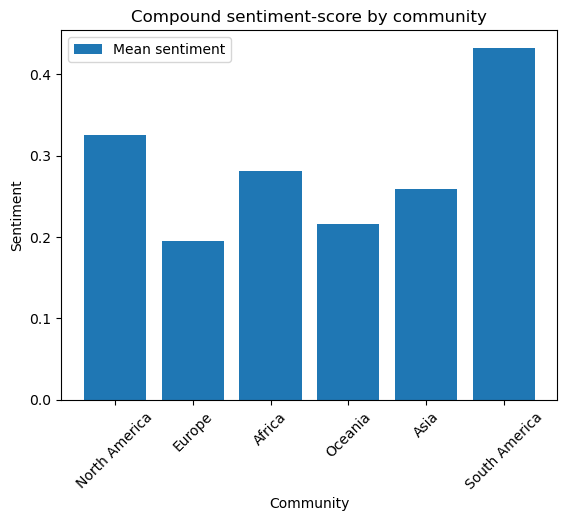

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

analyzer = SentimentIntensityAnalyzer()

keys = ["North America", "Europe", "Africa","Oceania", "Asia", "South America"]

sentiments = {}
for key in keys:
    sentiments[key] = []
    for review in tqdm(communities[key]):
        sentiment = analyzer.polarity_scores(review)
        sentiments[key].append(sentiment['compound'])



# plot the sentiments in the different communities
plt.bar(sentiments.keys(), [np.mean(sentiments[key]) for key in sentiments.keys()])
plt.ylabel('Sentiment')
plt.xlabel('Community')
plt.xticks(rotation=45)
plt.title('Compound sentiment-score by community')
plt.legend(['Mean sentiment'])
plt.show()





### A natural question that arises is if the sentiment of the reviews merely describe the quality of the airport in the same way that the binary variable "recommended" does. This is an interesting question that will need to be checked out:

100%|██████████| 377/377 [00:00<00:00, 94256.83it/s]


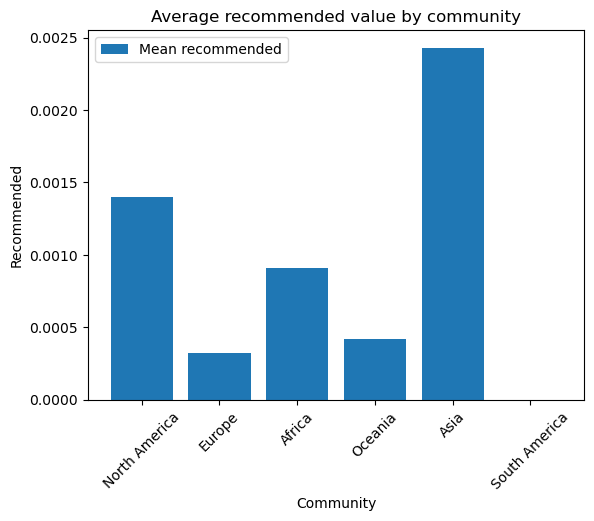

In [48]:
recommended = {}
for key in keys:
    recommended[key] = []
    for review in tqdm(communities[key]):
        recommended[key].append(int('Recommended' in review))

# plotting the average recommended value in the different communities
plt.bar(recommended.keys(), [np.mean(recommended[key]) for key in recommended.keys()])
plt.ylabel('Recommended')
plt.xlabel('Community')
plt.xticks(rotation=45)
plt.title('Average recommended value by community')
plt.legend(['Mean recommended'])
plt.show()


There definitely seems to be some correlation, but unfortunately we do not have any positive values for South America.

### As mentioned earlier, some of the "conventional methods" we have learned in the course are not the most informative in this specific case. Here is a showcase of some of them anyway:

$$
\text{{Lexical Diversity}} = \frac{{\text{{Number of unique words}}}}{{\text{{Total number of words}}}}
 $$

In [34]:
import re
import nltk

# Lexical diversity
def lexical_diversity(text):
    return len(set(text)) / len(text)

# Stemming
def stem(word):
     regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
     stem, suffix = re.findall(regexp, word)[0]
     return stem

# Tokenization + Stemming
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token.lower() for token in tokens]
    stopwords = set(nltk.corpus.stopwords.words('english'))
    tokens = [token for token in tokens if token not in stopwords]
    tokens = [stem(token) for token in tokens]
    return tokens


### Making a dictionary of the tokenized and stemmed reviews.
Then we first take a look at Zipf's Law. It looks like exactly the textbook example. According to "https://en.wikipedia.org/wiki/Zipf%27s_law", Zipf's law hold for most natural language and is thus a good way to check if the textdata is natural language. The plot shows that the most common words are very common and the least common words are very rare. This inverse power-law structure is what the formula prescribes.

$$
f(k; s, N) = \frac{1/k^s}{\sum_{n=1}^{N} 1/n^s}
$$
where $f(k; s, N)$ is the frequency of the k-th most frequent word, $s$ is the distribution parameter, and $N$ is the total number of words in the document.


In [35]:
# tokenize each community in the communities dictionary
from tqdm import tqdm
tokenized_communities = {}
for key in tqdm(communities):
    tokenized_communities[key] = []
    for review in communities[key]:
        tokenized_communities[key].extend(tokenize(review))


100%|██████████| 7/7 [00:22<00:00,  3.18s/it]


Merge all communities into one large one and make zipf plot.

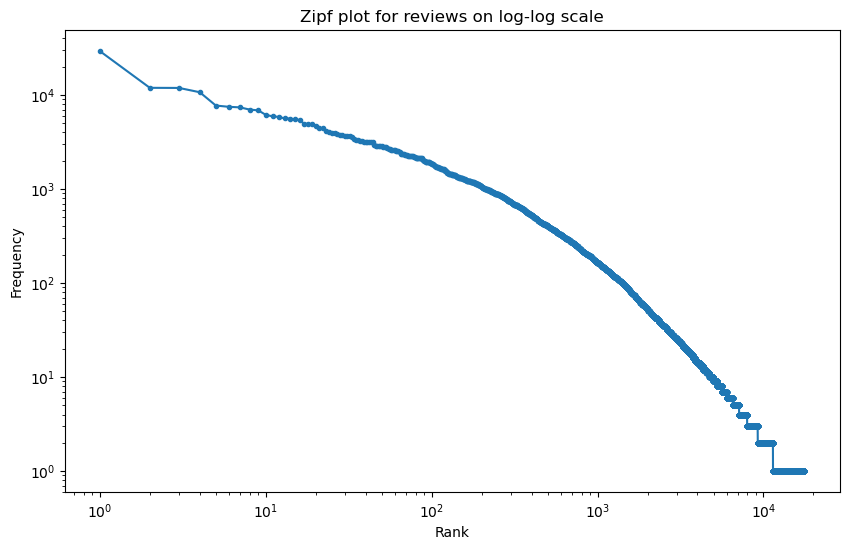

In [37]:
# big community, all communities merged into one
from collections import Counter
big_community = []
for key in tokenized_communities:
    big_community.extend(tokenized_communities[key])

word_count = Counter(big_community)
word_count.most_common(10)

# zipf plot on log log scale
import numpy as np
plt.figure(figsize=(10, 6))
ranks = np.arange(1, len(word_count) + 1)
freqs = [f for w, f in word_count.most_common()]
plt.loglog(ranks, freqs, marker=".")
plt.title("Zipf plot for reviews on log-log scale")
plt.ylabel("Frequency")
plt.xlabel("Rank")
plt.show()



Here we take a look at more of the aforementioned classical, yet in our case, not so informative methods. We will use wordclouds, TF, and TF-IDF to analyze the reviews. We will use the wordclouds to get a visual representation of the most common words in the reviews. 

$$
\text{{TF}} = \frac{{\text{{Number of times term t appears in a document}}}}{{\text{{Total number of terms in the document}}}}
$$

$$
\text{{IDF}} = \log\left(\frac{{\text{{Total number of documents}}}}{\text{{Number of documents with term t in it}}}\right)
$$

$$
\text{{TF-IDF}} = \text{{TF}} \times \text{{IDF}}
$$



In [38]:
### Functions for text analysis

def top_n_terms(list_of_tokens, n):

    counter = Counter(list_of_tokens)
    return counter.most_common(n)

def term_frequency(term, token_list):
    return token_list.count(term) / len(token_list)

def inverse_document_frequency(term, token_lists):
    num_docs_with_term = sum(1 for tokens in token_lists if term in tokens)
    return np.log( len(token_lists) / num_docs_with_term )

def tf_idf(term, token_list, token_lists):
    return term_frequency(term, token_list) * inverse_document_frequency(term, token_lists)


Now we apply the TF, IDF, TF-IDF and see that all communities are largely identical. The most common words for all communities are "airport", "security", "staff", "clean", "gate", "terminal", "flight", "time", "check", etc. 

In [45]:

top_words = {}
for key in tqdm(tokenized_communities):
    top_words[key] = {}
    for word, freq in word_count.most_common(10):
        tf = term_frequency(word, tokenized_communities[key])
        idf = inverse_document_frequency(word, tokenized_communities.values())
        tfidf = tf_idf(word, tokenized_communities[key], tokenized_communities.values())
        top_words[key][word] = {'TF': tf, 'IDF': idf, 'TF-IDF': tfidf}

print(f"top_words first 5: {list(top_words.items())[:5]}")

100%|██████████| 7/7 [00:00<00:00, 11.61it/s]

top_words first 5: [('Europe', {'airport': {'TF': 0.02710723783244928, 'IDF': 0.0, 'TF-IDF': 0.0}, 'terminal': {'TF': 0.010405865903436536, 'IDF': 0.0, 'TF-IDF': 0.0}, 'flight': {'TF': 0.011362759968122573, 'IDF': 0.0, 'TF-IDF': 0.0}, 'security': {'TF': 0.01235964363551191, 'IDF': 0.0, 'TF-IDF': 0.0}, 'staff': {'TF': 0.008323550162671991, 'IDF': 0.0, 'TF-IDF': 0.0}, 'one': {'TF': 0.0070838724788697795, 'IDF': 0.0, 'TF-IDF': 0.0}, 'time': {'TF': 0.007732275322701812, 'IDF': 0.0, 'TF-IDF': 0.0}, 'get': {'TF': 0.006829652861684533, 'IDF': 0.0, 'TF-IDF': 0.0}, 'check': {'TF': 0.006224096020748891, 'IDF': 0.0, 'TF-IDF': 0.0}, 'area': {'TF': 0.0057128003861853065, 'IDF': 0.0, 'TF-IDF': 0.0}}), ('Asia', {'airport': {'TF': 0.03167223752544993, 'IDF': 0.0, 'TF-IDF': 0.0}, 'terminal': {'TF': 0.009777129356429715, 'IDF': 0.0, 'TF-IDF': 0.0}, 'flight': {'TF': 0.011399392467908586, 'IDF': 0.0, 'TF-IDF': 0.0}, 'security': {'TF': 0.007958888150946683, 'IDF': 0.0, 'TF-IDF': 0.0}, 'staff': {'TF': 0.007

### Now we can try wordclouds for each community. We can see that the wordclouds are very similar for all communities. 


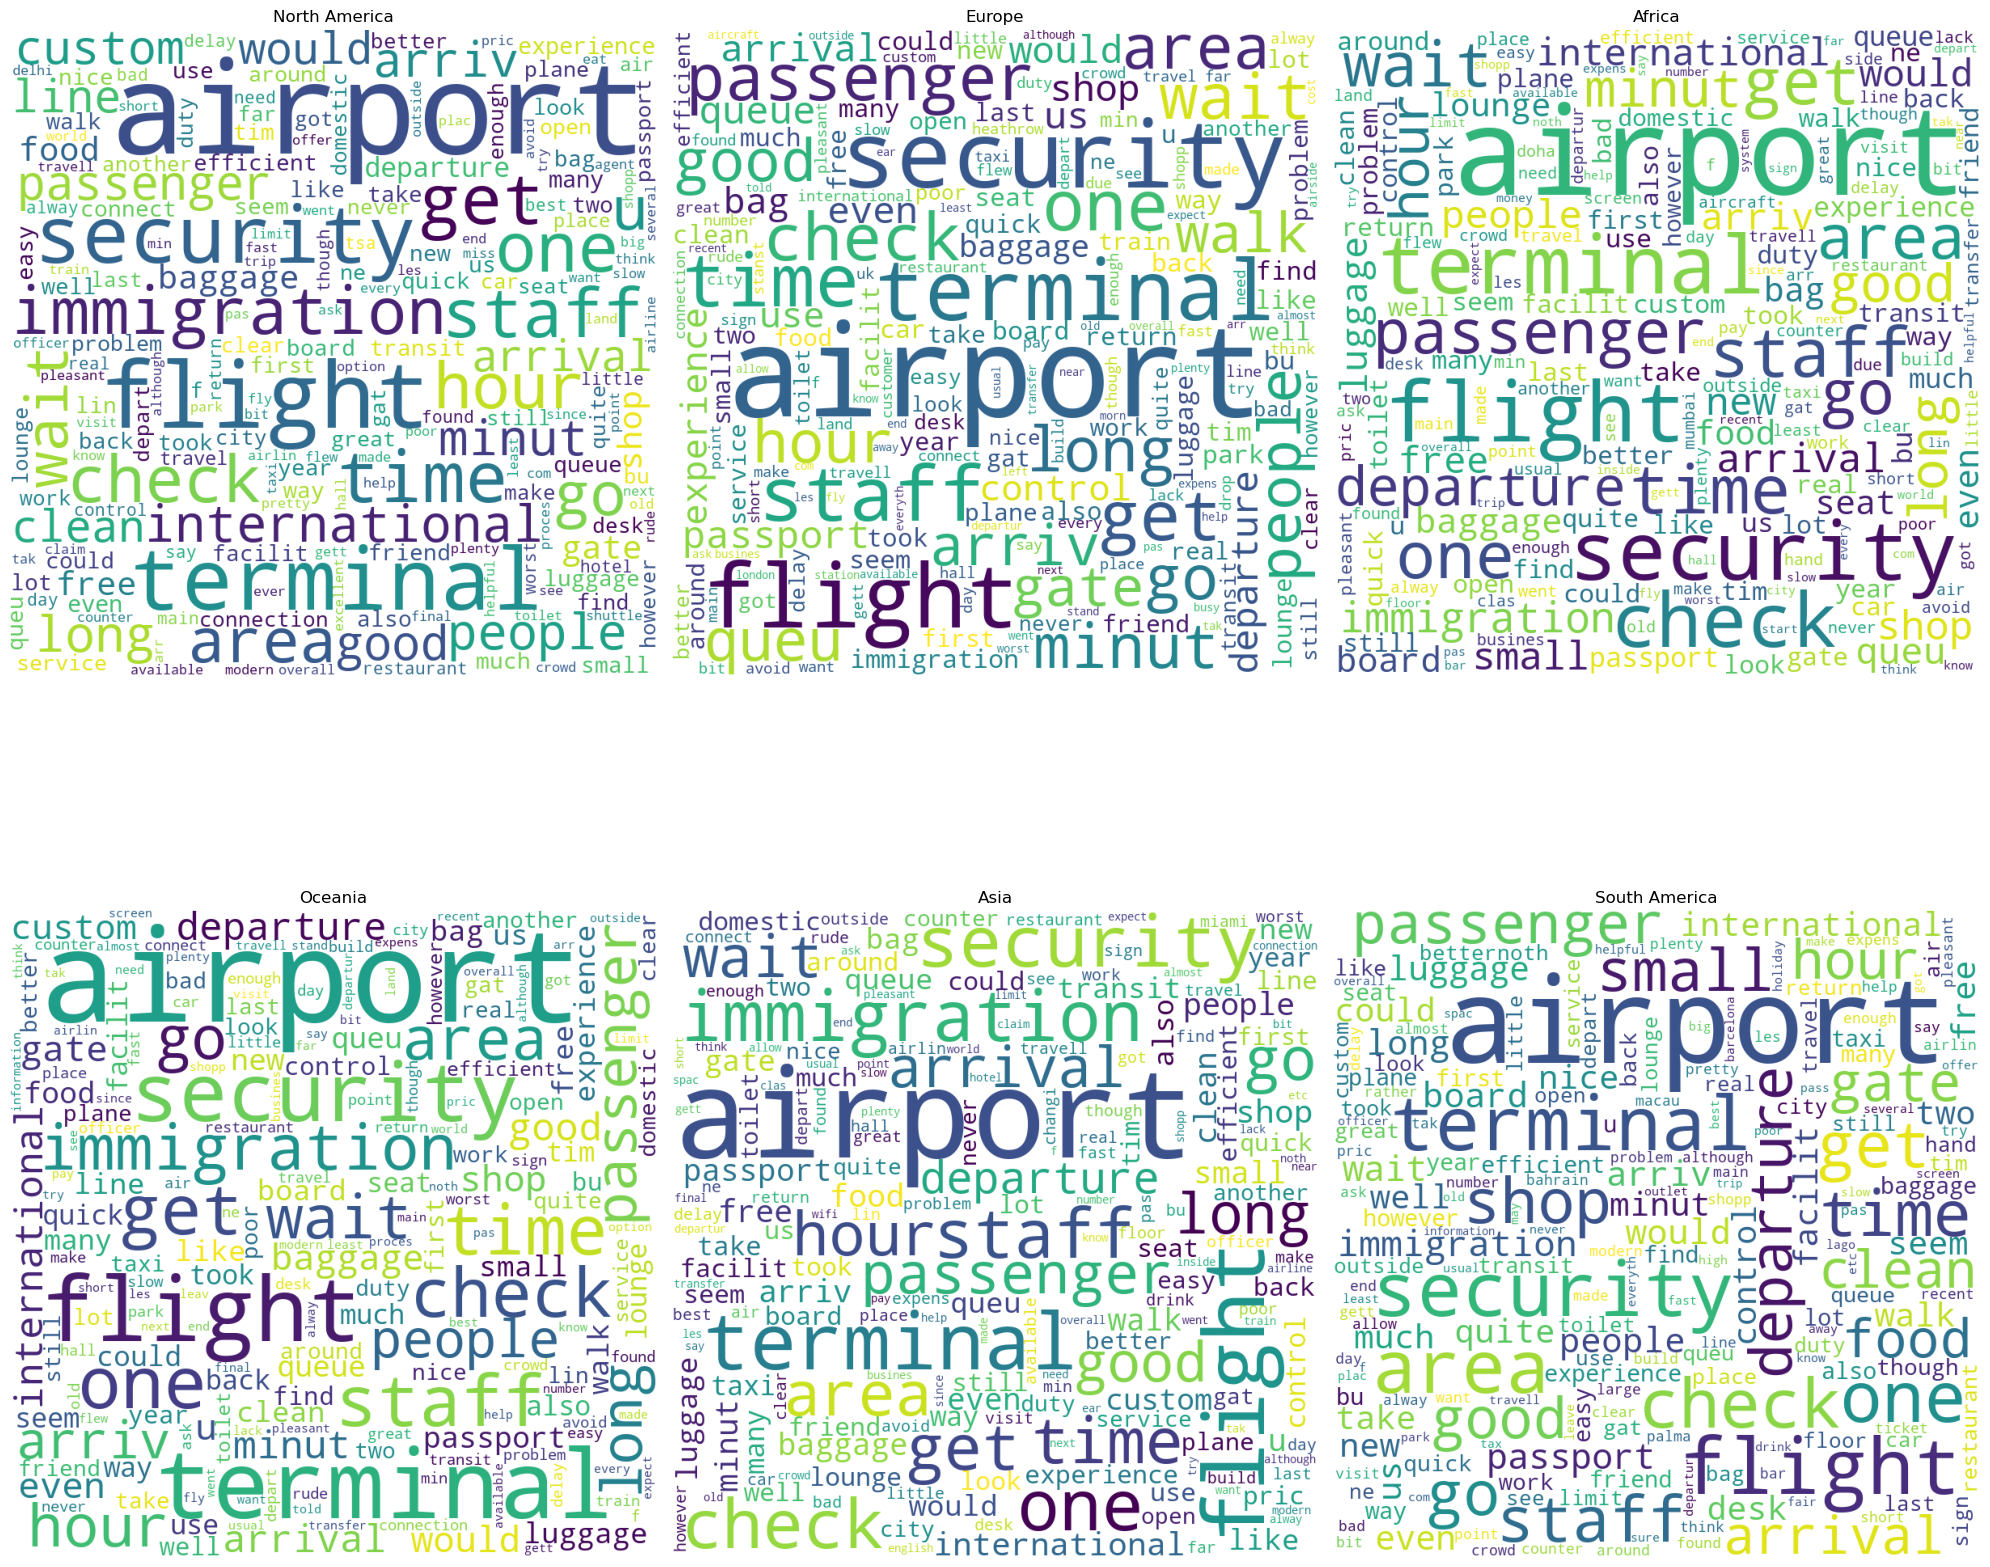

In [46]:
from wordcloud import WordCloud

plot_keys = ['North America', 'Europe', 'Africa', 'Oceania', 'Asia','South America']

plot_communities = {key: tokenized_communities[key] for key in plot_keys}

fig, axs = plt.subplots(2, 3, figsize=(20, 20)) 
for i, community in enumerate(plot_communities):
    ax = axs[i // 3, i % 3]
    word_freq = top_n_terms(plot_communities[community],len(plot_communities[community]))
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(word_freq))
    ax.imshow(wordcloud)
    ax.axis("off")

    ax.set_title(community)


plt.tight_layout()
plt.show()


### It could be the case that the top 5 most common words are "diluting" / " polluting" the wordclouds. We can try to remove these words and see if the wordclouds become more informative.

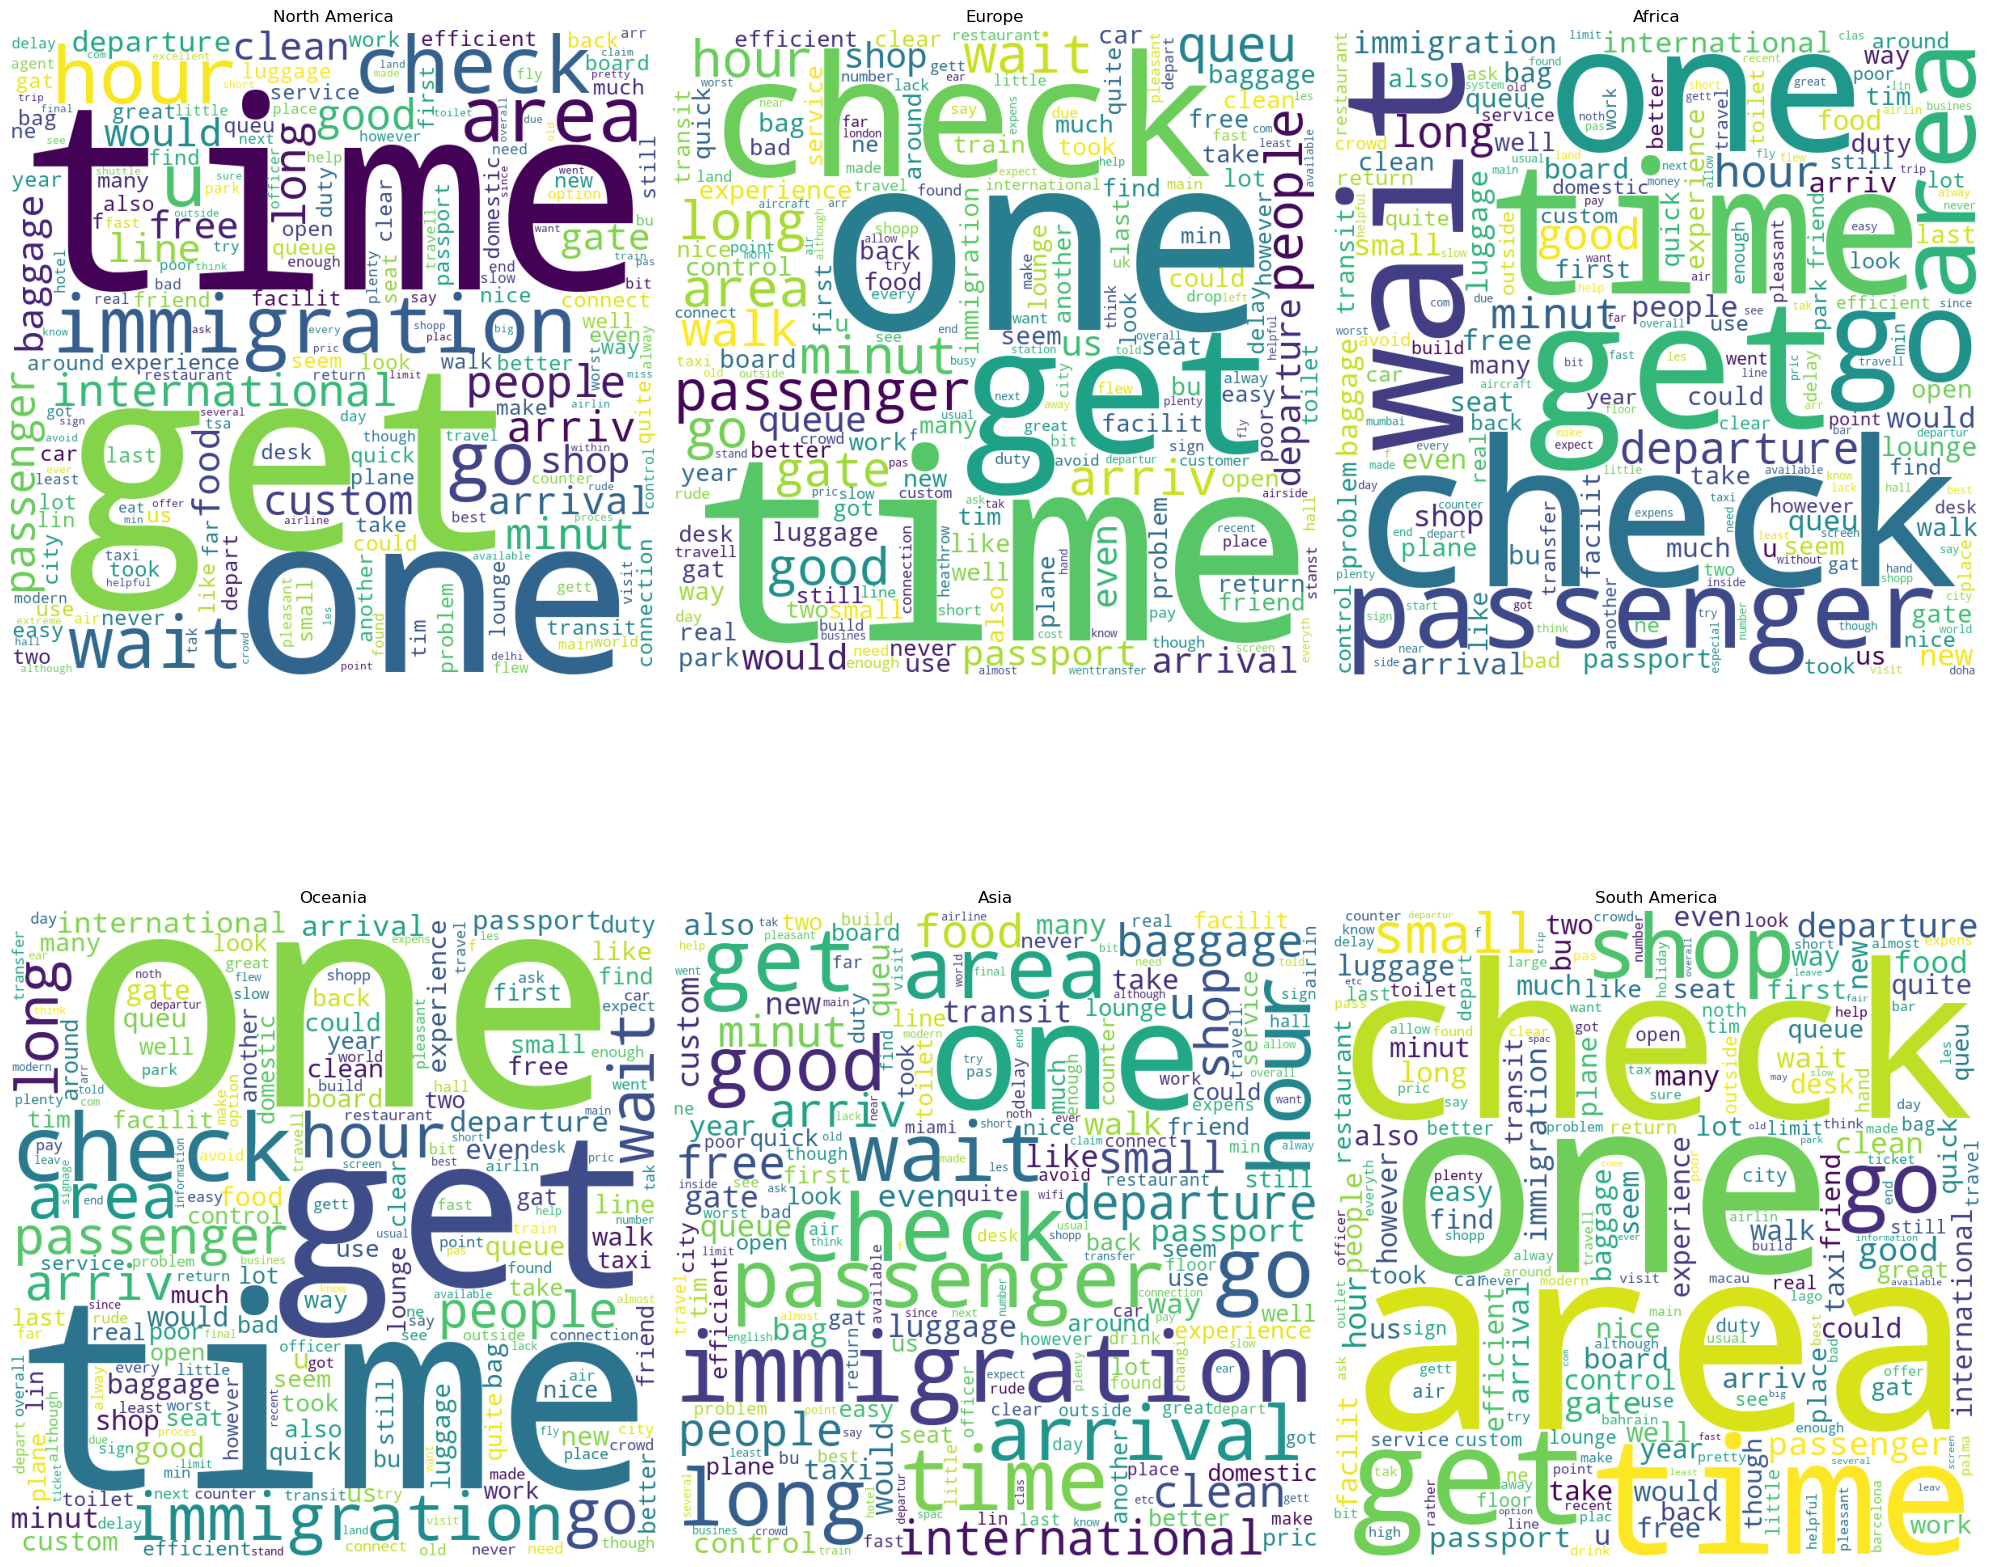

In [47]:
for key in plot_communities:
    top_words = [word for word, freq in word_count.most_common(5)]
    plot_communities[key] = [word for word in plot_communities[key] if word not in top_words]

# plot the word clouds again
fig, axs = plt.subplots(2, 3, figsize=(20, 20))
for i, community in enumerate(plot_communities):
    ax = axs[i // 3, i % 3]
    word_freq = top_n_terms(plot_communities[community], len(plot_communities[community]))
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(word_freq))
    ax.imshow(wordcloud)
    ax.axis("off")
    ax.set_title(community)

plt.tight_layout()
plt.show()


The wordclouds do not become noticably more explanatory. 
To wrap things up we can say that based on the testimonials from thousands of different passengers spanning the period from 2002-2015 in airports all across the world, the sentiment of the reviews are largely positive. There are some communities(continents) that seem to garner more positive reviews than others. Especially South America and North America are standout performers.